# Section 2: Filter, Constrast, Transformation and Morphology (Bộ lọc, Tương phản, Bộ biến đổi và Hình thái học)


## Filters (Lọc)
- Enhancing an image (Nâng cao chất lượng hình ảnh)
- Emphasize or remove features (Nhấn mạnh hoặc xoá một số tính năng)
- Smoothing and Sharpening (Làm mượt và mịn ảnh)
- Edge detection (Phát hiện cạnh)

## General Principle (Nguyên tắc chung)
- Nguyên tắc chung của các phương pháp lọc là cho ma trận ảnh nhân với một ma trận lọc (kernel). Ma trận lọc còn có thể được gọi là cửa sổ chập (trong phép nhân chập - window, mark,...).
- Việc nhân ảnh với ma trận lọc giống như việc trượt ma trận lọc theo hàng trên ảnh và nhân với từng vùng của ảnh, cộng các kết quả lại tạo thành kết quả của điểm ảnh trung tâm.

![Nguyên tắc chung của lọc ảnh](images/principle_filter.png)

## Neighborhoods (Vùng lân cận)
- Là các vùng xung quanh của một điểm ảnh đang được tham chiếu. Có nhiều định nghĩa về lân cận của một điểm ảnh, hay dùng nhất là 4 - neighbors, 8 - neighbors.

![Neighbors of a pixel](images/neighbors.png)

- Nhưng trong trường hợp ta muốn tham chiếu đến các điểm lân cận xa hơn điểm (x,y) thì ta phải sử dụng đến định nghĩa của khoảng cách giữa 2 điểm ảnh.

Khoảng cách của 2 điểm ảnh (Distance between two pixels)
- Công thức Euclidean: Đây là công thức cơ bản nhất để tính khoảng cách giữa 2 điểm.

![Công thức Euclidean](images/euclidean_formula.png)

_Nhưng kết quả đầu ra có thể là một số không nguyên, không dùng được trong định nghĩa lận cận giữa các điểm. **Vì thể, ta có công thức thứ 2, gọi là công thức City-block (hay Manhattan) sẽ cho ra kết quả là một số nguyên**_

![Công thức City-block](images/city_block_formula.png)

![Hình ảnh minh hoạ city-block](images/city_block_feagure.png)

_Song, có một vấn đề là công thức City-block biểu diễn cấu trúc các điểm lân cận có dạng hình thoi. Nếu biểu diễn trên ma trận ta sẽ cần điền thêm các số 0 ở các góc -> tốn tài nguyên. Nên ta sẽ có thêm công thức tính khoảng cách mới. ĐÓ LÀ CHESSBOARD DISTANCE (Khoảng cách bàn cờ vua)._
 
![Công thức Chessboard](images/chessboard_formula.png)

![Hình ảnh minh hoạ Chessboard](images/chessboard_feagure.png)

## Edge detection (Phát hiện cạnh)

Sobel: 
- Đây là một thuật toán phát hiện cạnh phổ biến. Ngoài ra, nó còn được sử dụng trong phát hiện điểm góc ảnh.



In [119]:
from skimage.filters import sobel
from skimage import data
from skimage.io import imshow
import matplotlib.pyplot as plt

def plot_comparison(original, filtered, title_filtered, off_axis = True):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,16), sharex= True, sharey=True)
    
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    if off_axis == True:
        ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    if off_axis == True:
        ax2.axis('off')
    pass

image_coins = data.coins()

# `sobel()` function requires a 2-dimensional grayscale image as input. So in the case of colored image, we'll need to convert it to grayscale first. Use rgb2gray() function in skimage.color library.
# `sobel()` là hàm yêu cầu hình ảnh đầu vào là ảnh thang xám. Trong trường hợp ảnh màu, ta sẽ cần chuyển đổi nó về thang xám trước tiên. Sử dụng hàm rgb2gray() trong thư viện skimage.color.
edge_sobel = sobel(image_coins)

plot_comparison(image_coins, edge_sobel, "Image with Edge Sobel Filter")

In [120]:
# Import the color module
from skimage import color, io

# Import the filters module and sobel function
from skimage.filters import sobel

# Load the image
soaps_image = io.imread('images/soaps_image.png')

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
plot_comparison(soaps_image, edge_sobel, "Soaps Image with Sobel Edge Detection")

## Gaussian Smoothing (Làm mượt sử dụng bộ lọc Gaussian)
- Bộ lọc Gaussian sẽ làm mờ các cạnh và giảm độ tương phản -> Hình ảnh sẽ trong mượt mà và ít góc cạnh hơn. Điều này sử dụng trong các kỹ thuật khác như **lọc khử răng cưa**.

In [35]:
from skimage.filters import gaussian
from skimage import data
from skimage.io import imshow

astronaut_pic = data.astronaut()
rocket_pic = data.rocket()


gaussian_image_1 = gaussian(amsterdam_pic, multichannel=True)
# multichannel = True nếu hình ảnh màu (đa kênh)
# = False nếu hình ảnh đơn sắc (đơn kênh)

gaussian_image_2 = gaussian(rocket_pic, multichannel=True)

plot_comparison(astronaut_pic, gaussian_image_1, "Blurred with Gaussian filter")
plot_comparison(rocket_pic, gaussian_image_2, "Blurred with Gaussian filter")

In [36]:
import skimage as ski

building_image = ski.io.imread(r'images/building_image.png')

gaussian_image = ski.filters.gaussian(building_image, multichannel=True)

plot_comparison(building_image, gaussian_image, "Blurring to reduce noise")


## Constrast Enhancement (Nâng độ tương phản)
- Về cơ bản, nâng độ tương phản là cho cân bằng lại độ sáng tối của điểm ảnh sao cho biên độ của điểm ảnh sáng nhất và điểm ảnh tối nhất gần bằng 255 (Tức là trải đều độ sáng tối của ảnh ra cân bằng nhất có thể)

Có 3 loại cân bằng:
+ Histogram equalization
+ Adaptive histogram equalization
+ Constrast limited adaptive histogram equalization. (CLAHE)

![Các loại cân bằng độ tương phản](images/constrast_enhancement_types.png)


In [45]:
# Sử dụng Histogram equalization trong thư viện
# skimage.exposure để cân bằng độ tương phản.
from skimage import exposure, io

image_files = [
    'low_constrast_image_1.png',
    'low_constrast_image_2.png',
    'low_constrast_image_3.png'
]

for image_file in image_files:
    image = io.imread('images/'+image_file)
    image_eq = exposure.equalize_hist(image)
    plot_comparison(image,image_eq,"Histogram Equalization")
    pass



In [54]:
# Sử dụng CLAHE trong thư viện skimage.exposure để 
# cân bằng độ tương phản

from skimage import exposure, io

image_files = [
    'low_constrast_image_1.png',
    'low_constrast_image_2.png',
    'low_constrast_image_3.png'
]

for image_file in image_files:
    clip_limits = [0.03, 0.06, 0.1]
    image = io.imread('images/'+image_file)
    for clip_limit in clip_limits:  # Added colon at the end of the for loop
        image_eq = exposure.equalize_adapthist(image, clip_limit=clip_limit)
        plot_comparison(image,image_eq,f"CLAHE in clip_limit={clip_limit}")
    pass

In [56]:
from skimage import exposure, io
from matplotlib import pyplot as plt

def plot_image_and_hist_comparison(original, equalized, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Image')
    ax2.imshow(equalized, cmap='gray')
    ax2.set_title('Equalized Image')
    plt.show()

    # Drawing histogram for the comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.hist(original.ravel(), bins=256, histtype='step', color='black')
    ax1.set_title('Histogram of Original Image')
    ax2.hist(equalized.ravel(), bins=256, histtype='step', color='black')
    ax2.set_title('Histogram of Equalized Image')
    plt.show()

image_files = [
    'low_constrast_image_1.png',
    'low_constrast_image_2.png',
    'low_constrast_image_3.png'
]

clip_limit = 0.03  # Assuming a clip_limit is defined, as it was missing in the provided code

for image_file in image_files:
    image = io.imread('images/'+image_file)
    image_eq = exposure.equalize_adapthist(image, clip_limit=clip_limit)
    plot_image_and_hist_comparison(image, image_eq, f"CLAHE in clip_limit={clip_limit}")

## Tranformations (Chuyển đổi hình ảnh)

### Why transform images ? (Tại sao phải chuyển đổi hình)
- Preparing images for classification ML models (Chuẩn bị hình ảnh cho việc phân loại trong ML)
- Optimization and compression of images (Tối ưu hoá hoặc nén hình ảnh)
- Save images with same proportion (Hoặc khi chúng ta cần tất cả các hình ảnh có cùng kích thước trước khi xử lý thêm gì đó).

### Rotating (Xoay ảnh)

In [66]:
# Sử dụng rotate() trong thư viện skimage.transform để xoay theo/ngược kim đồng hồ (rotating clockwise/anticlockwise)

from skimage import transform
from skimage import data

rocket_pic = data.rocket()

clockwise_rotated_image = transform.rotate(rocket_pic, -90)
anticlockwise_rotated_image = transform.rotate(rocket_pic, 90)


plot_comparison(rocket_pic, clockwise_rotated_image, "Clockwise Rotated Image", off_axis=False)
plot_comparison(rocket_pic, anticlockwise_rotated_image, "Anticlockwise Rotated Image", off_axis=False)


### Rescaling (Chỉnh sửa kích thước ảnh)

- Downgrade (Hạ cỡ ảnh)

In [3]:
# Sử dụng rescale() trong thư viện skimage.transform để hạ kích thước ảnh (downgrading) - Sử dụng coefficient

from skimage import transform
from skimage import data
import matplotlib.pyplot as plt

image = data.rocket()

coefficient = 1/4

image_rescaled = transform.rescale(image, coefficient, anti_aliasing=True, channel_axis=2)
image_rescaled_without_antialiasing = transform.rescale(image, coefficient, anti_aliasing=False, channel_axis=2)

def show_image(image, title, axis_off=True):
    plt.imshow(image)
    plt.title(title)
    if axis_off == True:
        plt.axis('off')
    plt.show()

show_image(image,'Original image', False)
show_image(image_rescaled,f'Rescaled image with Coef={coefficient}', False)
show_image(image_rescaled_without_antialiasing,f'Rescaled image with Coef={coefficient} w/out anti aliasing', False)


In [5]:
# Sử dụng resize() trong thư viện skimage.transform để hạ kích thước ảnh (downgrading) - Sử dụng (height, width)

from skimage import transform
from skimage import data

image = data.rocket()

height = 120
width = 200

# Trong python skimage sử dụng ma trận để xử lý các dữ liệu nên 
# theo ma trận ta có (row, col) => (height, width) (Hàng trước cột sau)

image_resized = transform.resize(image, (height, width), anti_aliasing=True)

show_image(image,'Original image', False)
show_image(image_resized,f'Rescaled image with height={height}, width={width}', False)

In [7]:
# Sử dụng resize() để hạ kích thước ảnh xuống một hệ số lần so với kích thước ảnh ban đầu

from skimage import transform
from skimage import data

image = data.chelsea()

height = image.shape[0] / 4
width = image.shape[1] / 4

image_resized = transform.resize(image, (height, width), anti_aliasing=True)

show_image(image,'Original image', False)
show_image(image_resized,f'Rescaled image with height=1/4, width=1/4', False)

## Morphology

- Shapes in scikit-image

In [44]:
from skimage import morphology as mpl
from matplotlib import pyplot as plt
import numpy as np

square = mpl.square(8)
rectangle = mpl.rectangle(8, 4)
disk = mpl.disk(2)
diamond = mpl.diamond(4)

ses = [
    {"name": "Square", "data": square},
    {"name": "Rectangle", "data": rectangle},
    {"name": "Disk", "data": disk},
    {"name": "Diamond", "data": diamond}
]

plt.figure(figsize=(15, 10))
for i, se in enumerate(ses, start=1):
    plt.subplot(1, 4, i)
    plt.imshow(se["data"])
    plt.title(se["name"])
    plt.axis('off')  # Turn off the axis
    plt.text(0.5, 0.5, se["data"], fontsize=12, ha='center', va='center', color='red', transform=plt.gca().transAxes)

- Erosion in scikit-image

In [64]:
from skimage import morphology, data, color
from matplotlib import pyplot as plt

# Assuming 'image_horse' should be loaded from 'data.horse()'
image_horse = data.horse()
print(image_horse.shape)

# Convert the horse image to a binary image, as 'data.horse()' loads a binary image represented with values 0 and 1
# Inverting the image because 'data.horse()' returns the horse as black on white background, but we need white on black for the erosion operation
image_horse = ~image_horse

selem = morphology.rectangle(12, 6)

# # Display the structural element
# plt.figure(figsize=(5, 5))
# plt.imshow(selem, cmap='gray')
# plt.title("Rectangle")
# plt.axis('off')
# plt.show()

# Perform erosion with selem
eroded_image_with_selem = morphology.binary_erosion(image_horse, selem)

# Perform erosion with DEFAULT selem
eroded_image_with_default_selem = morphology.binary_erosion(image_horse)

# Display the eroded image
plot_comparison(image_horse,eroded_image_with_selem,"Eroded Image With Rectangle Selem")
plot_comparison(image_horse,eroded_image_with_default_selem,"Eroded Image With Default Selem")

- Dilation in scikit-image

In [65]:
from skimage import morphology, data, color
from matplotlib import pyplot as plt

# Assuming 'image_horse' should be loaded from 'data.horse()'
image_horse = data.horse()
print(image_horse.shape)

# Convert the horse image to a binary image, as 'data.horse()' loads a binary image represented with values 0 and 1
# Inverting the image because 'data.horse()' returns the horse as black on white background, but we need white on black for the erosion operation
image_horse = ~image_horse

selem = morphology.rectangle(12, 6)

# # Display the structural element
# plt.figure(figsize=(5, 5))
# plt.imshow(selem, cmap='gray')
# plt.title("Rectangle")
# plt.axis('off')
# plt.show()

# Perform erosion with selem
dilated_image_with_selem = morphology.binary_dilation(image_horse, selem)

# Perform erosion with DEFAULT selem
dilated_image_with_default_selem = morphology.binary_dilation(image_horse)

# Display the eroded image
plot_comparison(image_horse,dilated_image_with_selem,"Dilated Image With Rectangle Selem")
plot_comparison(image_horse,dilated_image_with_default_selem,"Dilated Image With Default Selem")

# Section 3: Image Restoration, Noise, Segmentation and Contour (Phục hồi ảnh, Nhiễu, Phân đoạn và Đường bao quanh)

## Image reconstruction

### _"Inpainting"_: Đây là việc phục hồi các phần bị mất hoặc bị giảm chất lượng của hình ảnh.
- Reconstructing lost parts of images
- Looking at the non-damaged regions

In [23]:
def add_defect_mask_to_image(image, mask):
    """
    Adds a defect mask to an image. The mask should be a binary image where the defects are marked with 1s.
    The function will set the pixels of the image to 0 (black) where the mask has 1s.

    Parameters:
    - image: numpy array, the original image.
    - mask: numpy array, the defect mask, must be the same shape as the image.

    Returns:
    - modified_image: numpy array, the image with defects added.
    """
    
    # Ensure the mask is boolean
    mask = mask.astype(bool)
    
    # Create a copy of the image to modify
    modified_image = np.copy(image)
    
    # Apply the mask: Set pixels in the image to 0 where the mask is True
    modified_image[mask] = 0
    
    return modified_image

# Example usage:
# modified_image = add_defect_mask_to_image(image, mask)
# plt.imshow(modified_image, cmap='gray')
# plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_mask(image_shape, num_defects):
    mask = np.zeros(image_shape, dtype=np.bool_)
    for _ in range(num_defects):
        x = np.random.randint(0, image_shape[0])
        y = np.random.randint(0, image_shape[1])
        mask[x:x+np.random.randint(1, 100), y:y+np.random.randint(1, 100)] = True
    return mask

In [25]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

image = data.astronaut()
mask = generate_random_mask(image.shape, np.random.randint(0, 6))
modified_image = add_defect_mask_to_image(image, mask)

plot_comparison(image, modified_image, "Masked Image")

In [26]:
from skimage.restoration import inpaint
from skimage.transform import resize

# Ensure that modified_image and mask have the same shape
print(modified_image.shape)
print(mask.shape)

restore_image = inpaint.inpaint_biharmonic(modified_image, mask)

plot_comparison(modified_image, restore_image, 'Restored Image')

## Noise (Nhiễu)

Nhiễu là kết quả của lỗi trong quá trình thu nhận hình ảnh dẫn đến giá trị pixel không phản ánh cường độ thực của cảnh thực

In [28]:
# Ta có thể thêm nhiễu bằng function random_noise() trong module utils.

from skimage.util import random_noise
from skimage.data import astronaut

image = astronaut()

noisy_image = random_noise(image)

plot_comparison(image,noisy_image,"Noisy Image")

### Denoising (Khử nhiễu)

- `TV denoising` (Total variation) (Bộ lọc tổng biến thể): Bộ lọc này cố gắng giảm thiểu tổng số biến thể của hình ảnh. Nó có xu hướng tạo ra những hình ảnh "giống như phim hoạt hình", tức là những hình ảnh không đổi theo từng mảnh.

- `Bilateral` (Lọc song phương): Bộ lọc này làm mịn hình ảnh trong khi vẫn giữ nguyên các cạnh. Nó thay thế cường độ của mỗi pixel bằng giá trị cường độ trung bình có trọng số từ các pixel lân cận.

- `Wavelet denoising`

- `Non-local means denoising`

In [30]:
# TV denoising

from skimage.restoration import denoise_tv_chambolle

denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1)

# weight ở đây thể hiện trọng lượng khử nhiễu, trọng lượng cầng lớn, nhiều càng nhiều nhưng nó cũng có thể làm cho hình ảnh mịn hơn

plot_comparison(noisy_image, denoised_image, "Denoised Image")

In [34]:
# Bilateral

from skimage.restoration import denoise_bilateral

denoised_image = denoise_bilateral(noisy_image, channel_axis=-1)

plot_comparison(noisy_image, denoised_image, "Denoised Image")

### Superpixels & segmentation (Siêu pixel & phân đoạn ảnh)

- `Superpixels`: Là một nhóm các pixel được kết nối với các màu hoặc mức xám tương tự nhau. Chúng mang nhiều ý nghĩa hơn so với các bản sao lưới pixel đơn giản của chúng. 
- Phân đoạn superpixel là chia hình ảnh thành các superpixel. Nó được áp dụng cho nhiều nhiệm vụ thị giác máy tính, như theo dõi trực quan và phân loại hình ảnh.
- Segmentation (Phân đoạn ảnh): Có `2` loại phân đoạn ảnh:
    + `Supervised` (Có giám sát): Sử dụng các kiến thức trước đây để hướng dẫn thuật toán. Giống như loại ngưỡng, tự chỉ định giá trị ngưỡng.
    + `Unsupervised` (Không có giám sát): Không yêu cầu các kiến thức trước đây, các thuật toán này cố gắng chia nhỏ hình ảnh thành các vùng có ý nghĩa một cách tự động. Song, người dùng vẫn có thể tinh chỉnh một số cài đặt nhất định để có được kết quả đầu ra mong muốn. `Ngưỡng otsu` là một ví dụ điển hình.

- Unsupervised segmentation
    + `Simple Linear Iterative Clustering` (Phân đoạn lặp tuyến tính đơn giản) (`SLIC`): Phân đoạn hình ảnh bằng cách sử dụng một thuật toán học máy gọi là phân cụm `K-Means`. Nó nhận tất cả các giá trị pixel của hình ảnh và cố gắng tách chúng thành một số vùng con được xác định trước.

In [40]:
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage.data import astronaut

image = astronaut()

# Default numbers of segment
segments = slic(image)

# Custom numbers of segment
segment_custom = slic(image, n_segments=300)

segmented_image = label2rgb(segments, image, kind='avg')
segmented_image_custom = label2rgb(segment_custom, image, kind='avg')

plot_comparison(image,segmented_image,'Segmented Image')
plot_comparison(image,segmented_image_custom,'Segmented Image')

### Finding Contour (Tìm đường viền)



In [82]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.measure import find_contours

image = imread(r"datasets/dices.png")

gray_image = rgb2gray(image)

# plot_comparison(image,gray_image,"Gray Scale Image")

threshold = threshold_otsu(gray_image)

thresholded_image = gray_image > threshold

# plot_comparison(gray_image, thresholded_image, "Thresholded Image")

contours = find_contours(thresholded_image, 0.4)

def plot_contours(image, contours):
    fig, [ax1, ax2] = plt.subplots(ncols=2)
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('BW Image')
    ax2.imshow(gray_image, cmap=plt.cm.gray)
    for contour in contours:
        ax2.plot(contour[:, 1], contour[:, 0], linewidth=4)
    ax2.axis('off')
    ax2.set_title('Contours Image')
    
plt.show()

plot_contours(thresholded_image, contours)

shape_contours = [cnt.shape[0] for cnt in contours]

max_dots_shape = 50

dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

plot_contours(thresholded_image, dots_contours)

print("Dice's dots number: {}. ".format(len(dots_contours)))


# Advanced Operations, Detecting Faces and Features (Nâng cao, Phát hiện khuôn mặt và các chi tiết)

### Finding the edges with Canny (Phát hiện cạnh với thuật toán Canny)

In [101]:
from skimage.feature import canny
from skimage.data import coins

image = coins()

canny_edges = canny(image, sigma=1.0)
# Bước đầu của thuật toán phát hiện cạnh Canny là sử dụng Bộ lọc Gaussian để khử nhiễu nên sigma ở đây thể hiện trọng số lọc của bộ lọc Gaussian.
canny_edges_2 = canny(image, sigma=0.5)

plot_comparison(image, canny_edges, 'Canny Edges')
plot_comparison(image, canny_edges_2, 'Canny Edges With Sigma=0.5')

### Right around the corner (Phát hiện điểm góc)

A total of  20  corners were detected.


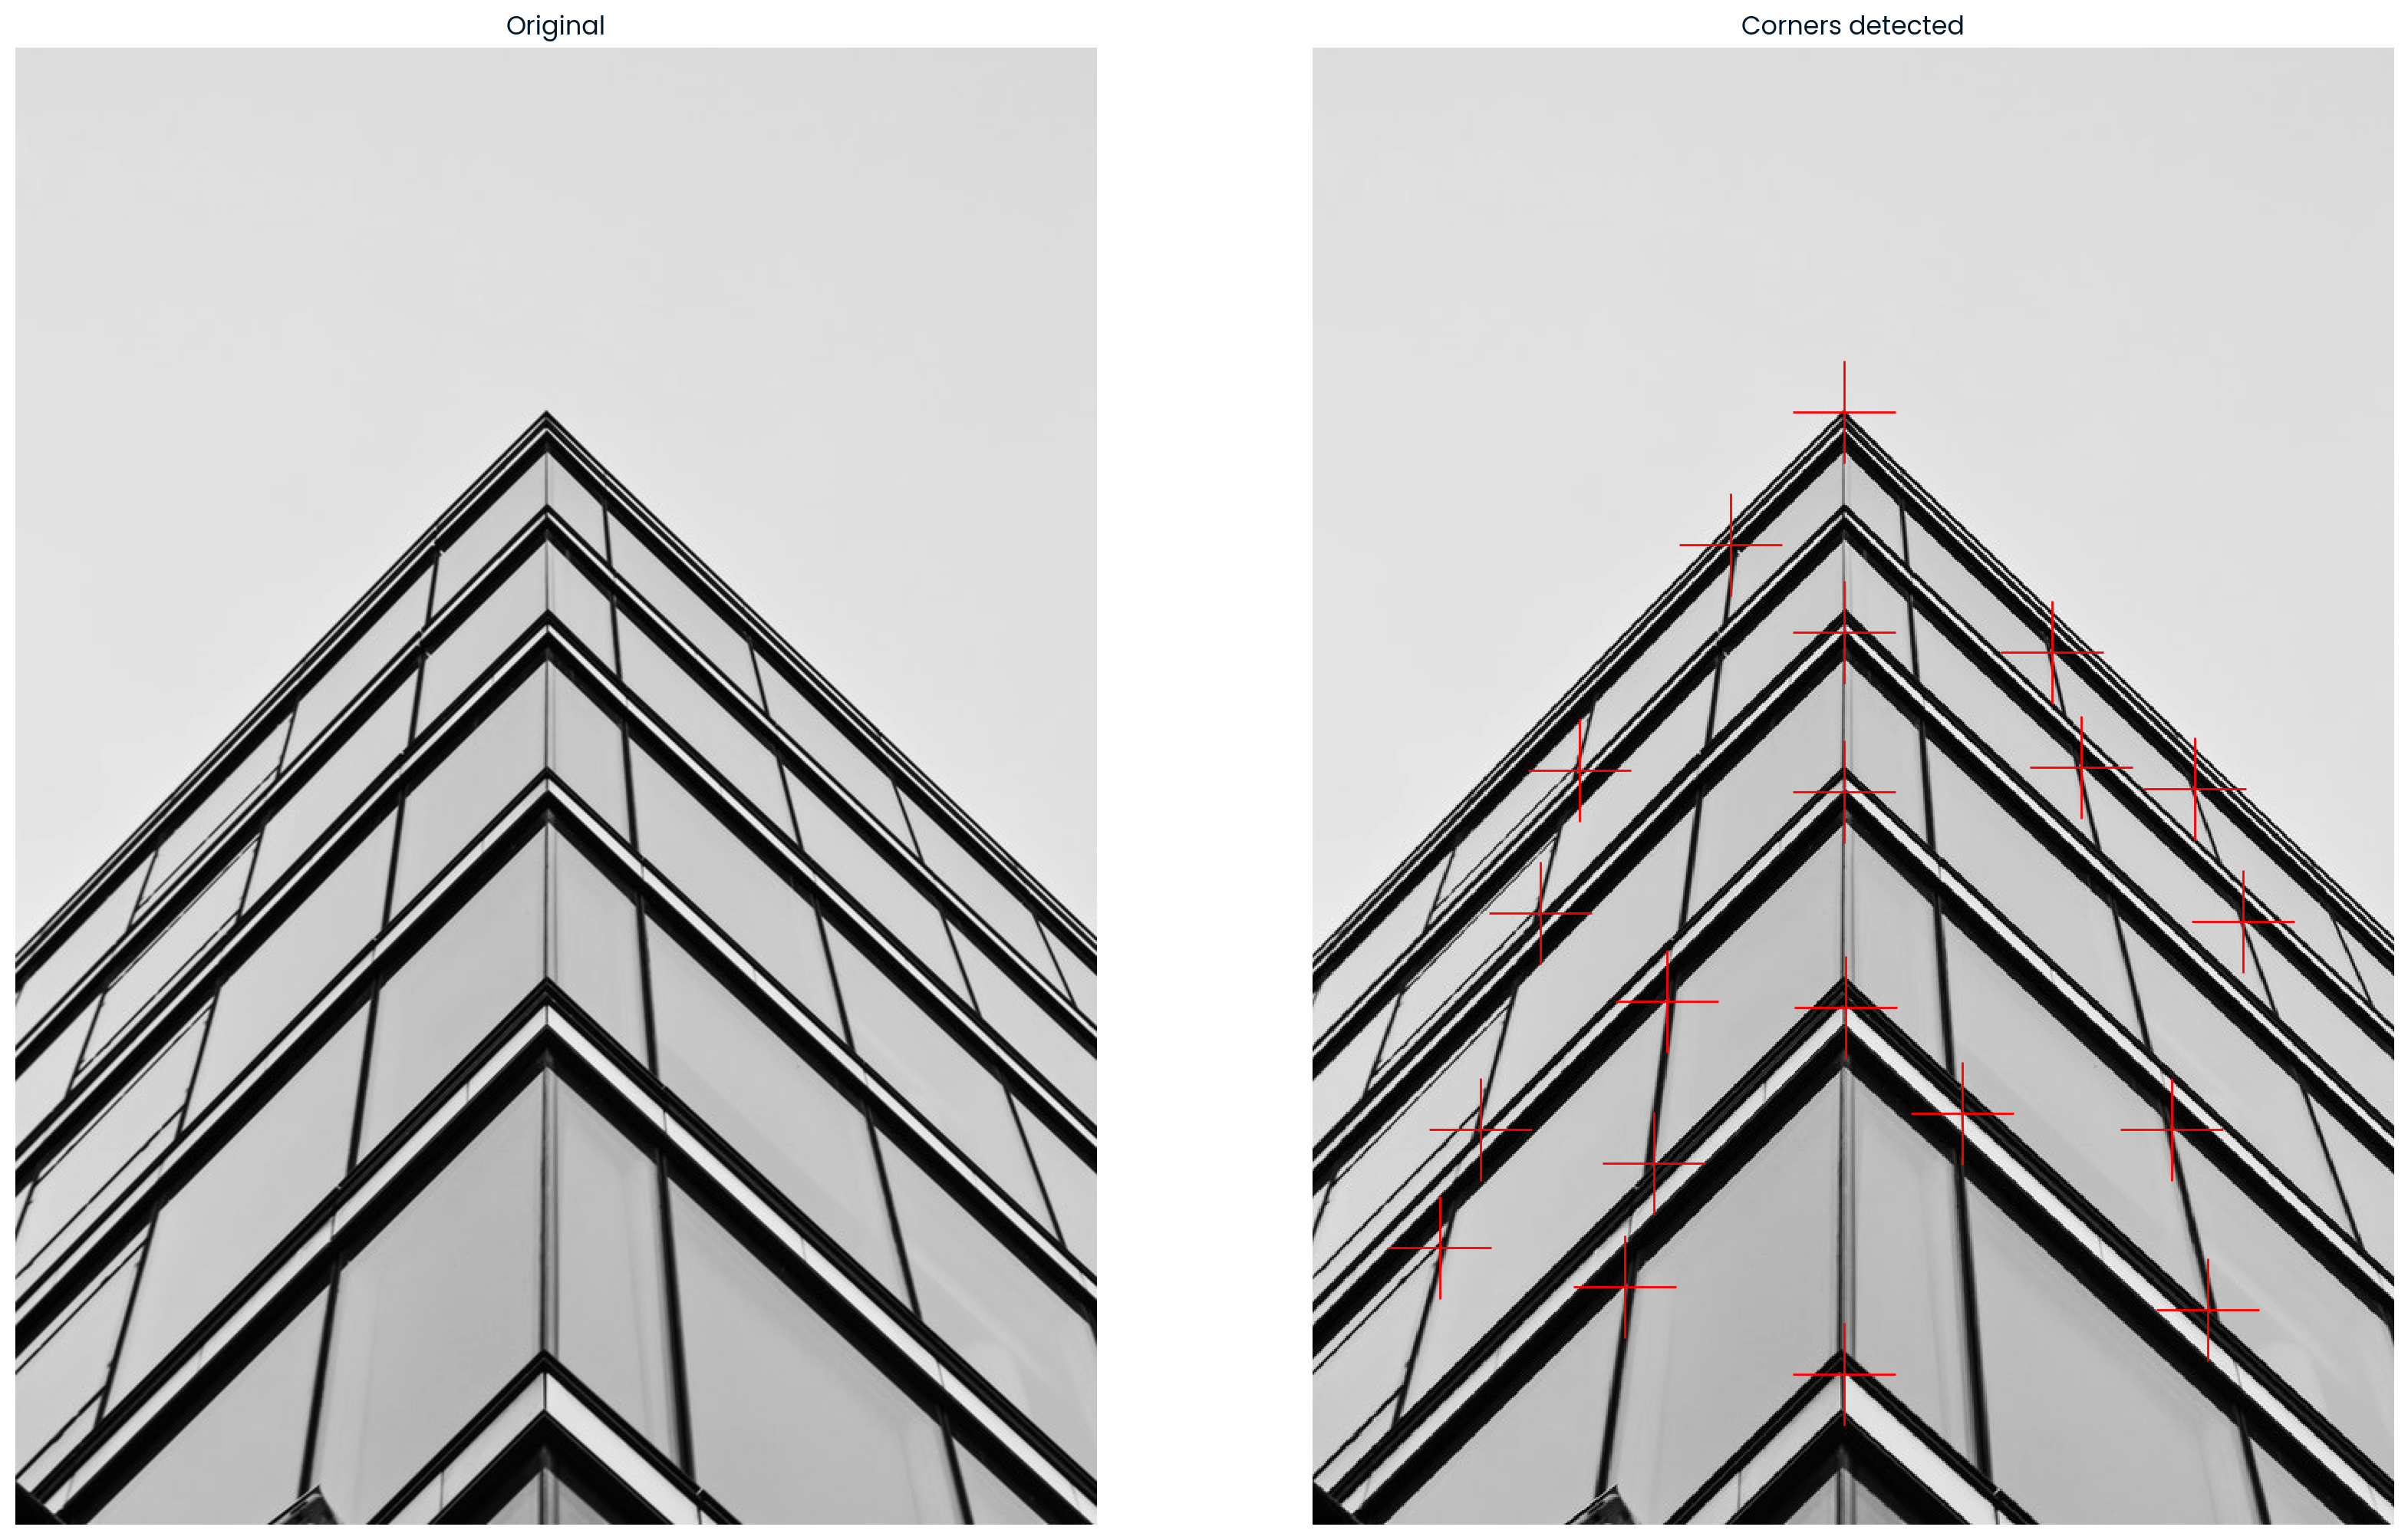

In [145]:
from skimage.io import imread
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray

image = imread(r'datasets/corners_building_top.jpg')

image = rgb2gray(image)

corner_harris_image = corner_harris(image)

plot_comparison(image,corner_harris_image, 'Original Image')

coords = corner_peaks(corner_harris_image, min_distance=60, threshold_rel=0.02)

print("A total of ", len(coords), " corners were detected.")

def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=48)
    plt.axis('off')
    plt.show()
    
show_image_with_corners(image, coords)

### Face detection use cases

- Filters: Áp dụng bộ lọc
- Auto focus: Tự động focus vào khuôn mặt
- Recommendations: Tự động đề xuất gắn thẻ khuôn mặt
- Blur for privacy protection: Làm mờ để bảo vệ quyền riêng tư
- To recognize emotions later on: Nhận diện khuôn mặt để áp dụng các thuật toán khác.

{'r': 202, 'c': 31, 'width': 35, 'height': 35}


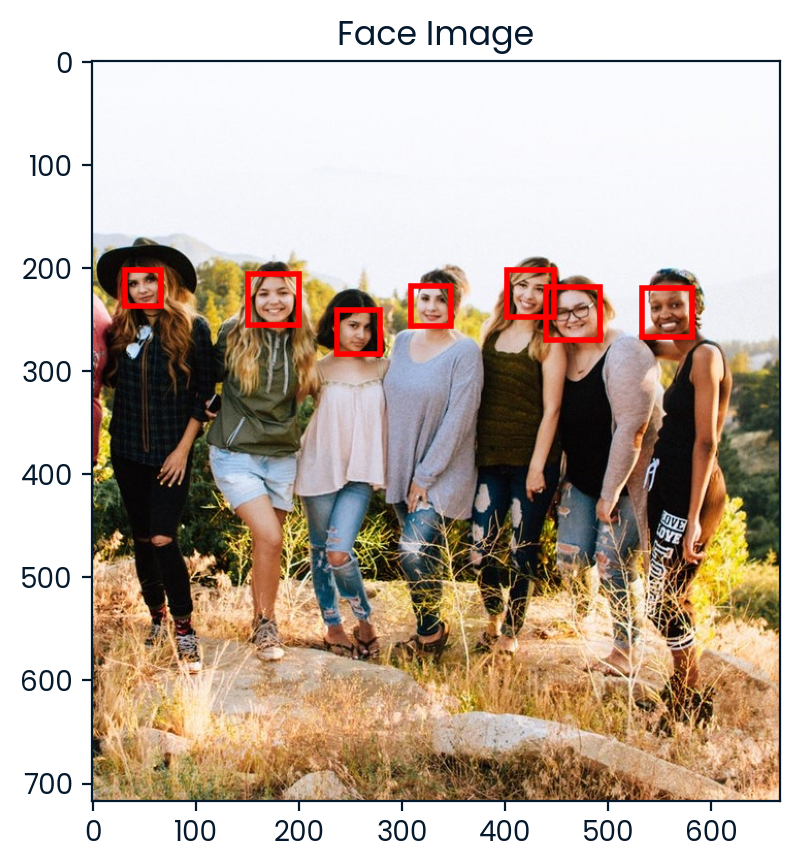

In [167]:
from skimage.feature import Cascade
from skimage.data import lbp_frontal_face_cascade_filename
from skimage.io import imread
from matplotlib import pyplot as plt
import matplotlib.patches as patches

image = imread(r"datasets/face_det_friends22.jpg")

trained_file = lbp_frontal_face_cascade_filename()

detector = Cascade(trained_file)

detected = detector.detect_multi_scale(img=image, scale_factor=1.2, step_ratio=1, min_size=(20,20), max_size=(200,200))

print(detected[0])

def show_detected_face(result, detected, title="Face Image"):
    plt.imshow(result), plt.set_cmap('gray'), plt.title(title)
    img_desc = plt.gca()
    
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False, color='r', linewidth=2
            )
        )
    plt.show()

show_detected_face(image, detected)

### Real-world applications

#### Privacy protection (Bảo vệ quyền riêng tư)

{'r': 202, 'c': 31, 'width': 35, 'height': 35}


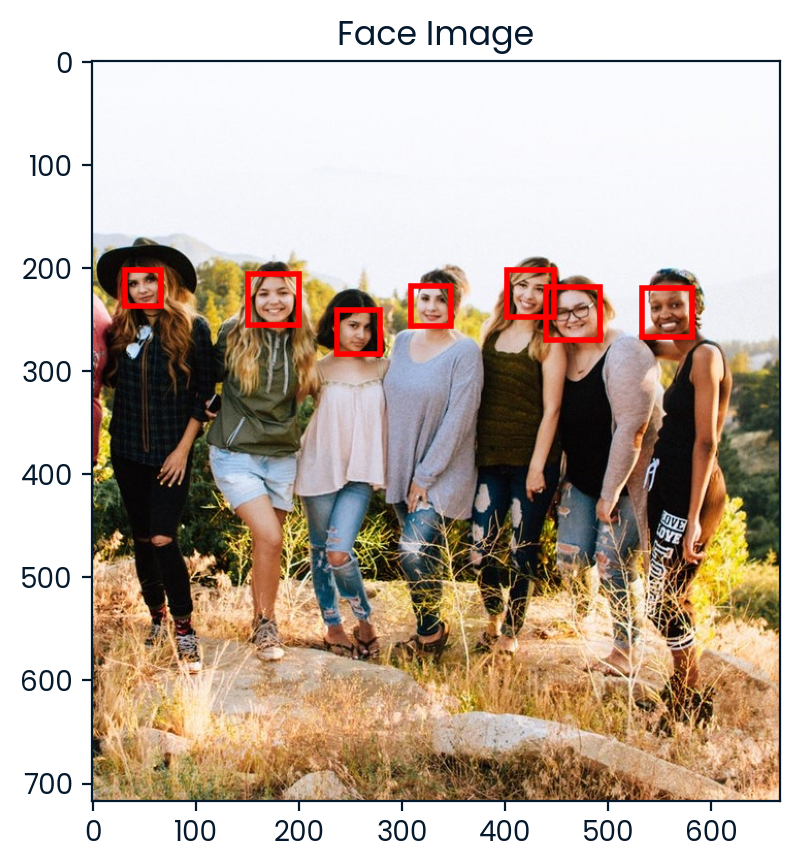

7


In [168]:
from skimage.feature import Cascade
from skimage.data import lbp_frontal_face_cascade_filename
from skimage.io import imread
from matplotlib import pyplot as plt
import matplotlib.patches as patches

image = imread(r"datasets/face_det_friends22.jpg")

trained_file = lbp_frontal_face_cascade_filename()

detector = Cascade(trained_file)

detected = detector.detect_multi_scale(img=image, scale_factor=1.2, step_ratio=1, min_size=(20,20), max_size=(200,200))

def show_detected_face(result, detected, title="Face Image"):
    plt.imshow(result), plt.set_cmap('gray'), plt.title(title)
    img_desc = plt.gca()
    
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False, color='r', linewidth=2
            )
        )
    plt.show()

show_detected_face(image, detected)

def get_face(image, d):
    return image[d['r']: d['r'] + d['width'], d['c']: d['c'] + d['height']]

faces = [get_face(image, data) for data in detected]

print(len(faces))



